In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from data_processing import dataset
from models import model
from utils import tools
from plots import plots, edge_detection_plots

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

2023-01-26 11:16:39.194840: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-26 11:16:39.486326: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-26 11:16:39.605412: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-01-26 11:16:40.923634: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
config_directory = 'edge_detection_with_prior'

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
DataProcessing = dataset.DataProcessing(config_path=config_path)
Model = model.Model(config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.path_definitions()

2023-01-26 11:16:44.385919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 11:16:44.407632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 11:16:44.407922: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-26 11:16:44.409789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Load Dataset, Preprocess Images and Dataset

The TRAIN DS contains 767 images.
The TEST DS contains 40 images.
The IMG_ONLY DS contains 41 images.


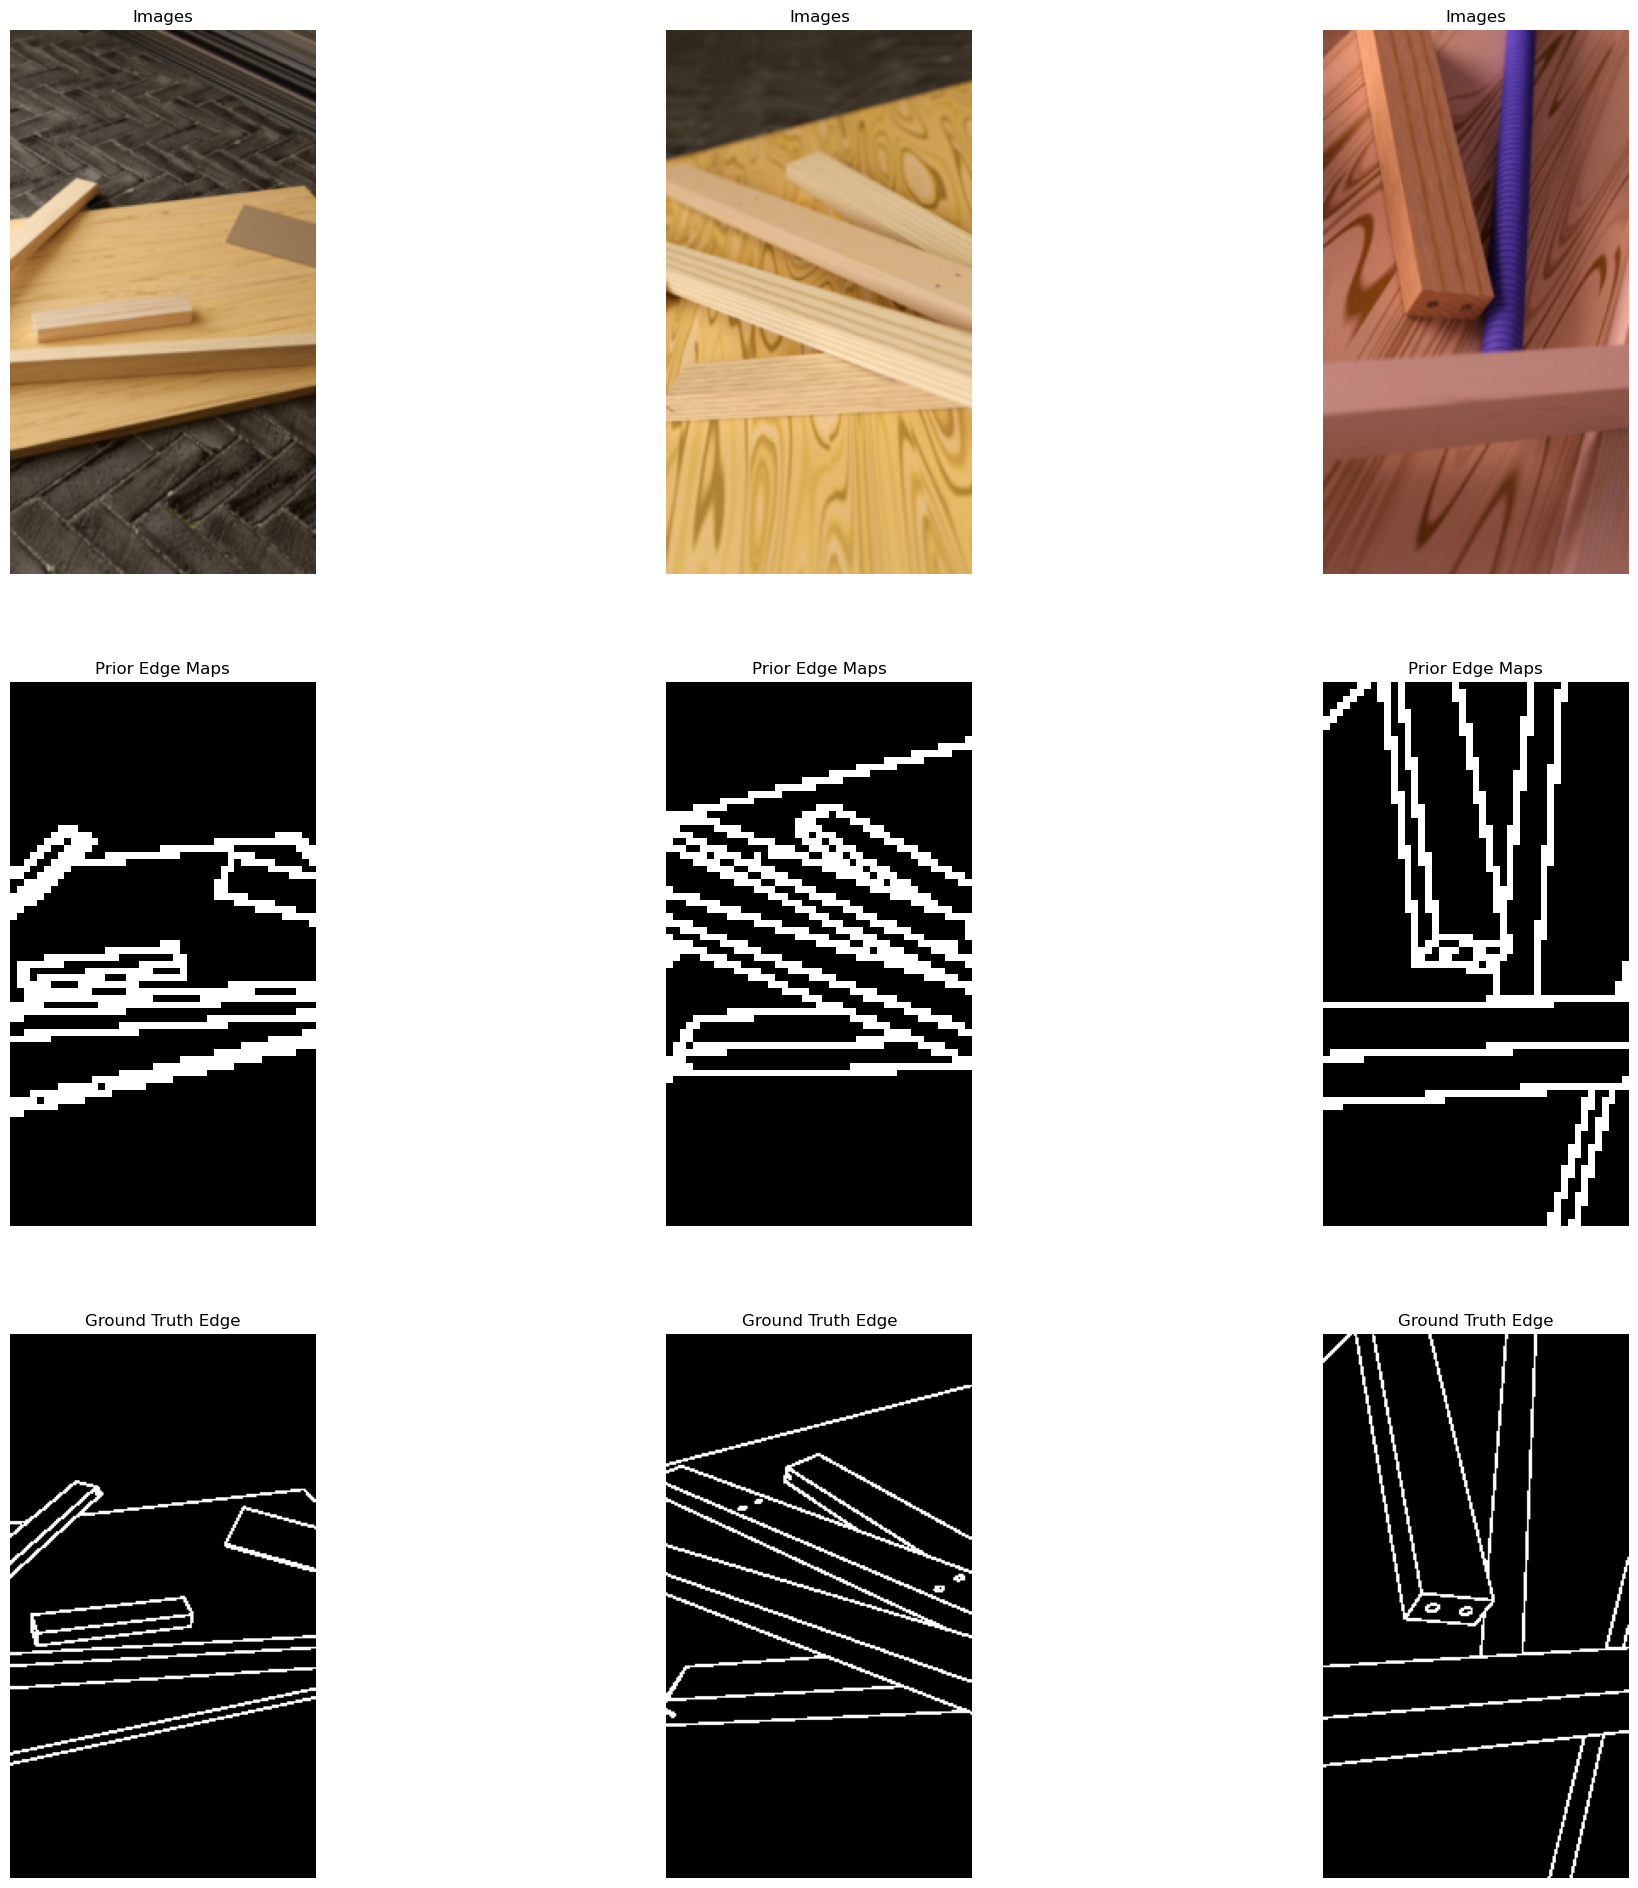

2023-01-26 11:16:50.622295: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [3]:
if Model.train_model:
    train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

img_only_ds, img_count_img_only_ds = DataProcessing.load_dataset(DataProcessing.key.img_only)

if Model.train_model:
    for inp, out in test_ds.take(1):
        edge_detection_plots.plot_edges(images=inp['in_img'], labels_edge=out['out_edge'],
                                        prior = inp['in_edge'],
                                        batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'])

# Define, Compile and Train Model

In [ ]:
if Model.train_model:
    model = Model.get_neural_network_model(DataProcessing.input_data_cfg, DataProcessing.output_data_cfg)
    # model.summary()

    lr = Model.get_lr(img_count_train, DataProcessing.cfg['TRAIN']['BATCH_SIZE'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=Model.get_loss_function(DataProcessing.output_data_cfg),
                  metrics=Model.get_metrics(DataProcessing.output_data_cfg))

    history = model.fit(train_ds, epochs=Model.cfg["EPOCHS"], validation_data=train_ds,
                        callbacks=Model.get_callbacks(), verbose=1)

model = Model.get_best_model_from_checkpoints()

Epoch 1/200


2023-01-26 11:17:12.865587: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-01-26 11:17:15.645518: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


256/256 [==============================] - 46s 91ms/step - loss: 354.4298 - out_edge_loss: 354.4298 - accuracy: 0.8227 - accuracy_edge_1: 0.8227 - f1_edge: 0.3235 - precision_edge: 0.2469 - recall_edge: 0.5191 - f1_edge_1: 0.3235 - precision_edge_1: 0.2469 - recall_edge_1: 0.5191 - val_loss: 790.0817 - val_out_edge_loss: 790.0817 - val_accuracy: 0.9327 - val_accuracy_edge_1: 0.9327 - val_f1_edge: 5.1124e-05 - val_precision_edge: 0.9714 - val_recall_edge: 2.5563e-05 - val_f1_edge_1: 5.1124e-05 - val_precision_edge_1: 0.9714 - val_recall_edge_1: 2.5563e-05
Epoch 2/200
256/256 [==============================] - 24s 93ms/step - loss: 231.9914 - out_edge_loss: 231.9914 - accuracy: 0.9571 - accuracy_edge_1: 0.9571 - f1_edge: 0.6987 - precision_edge: 0.6957 - recall_edge: 0.7019 - f1_edge_1: 0.6987 - precision_edge_1: 0.6957 - recall_edge_1: 0.7019 - val_loss: 255.7229 - val_out_edge_loss: 255.7229 - val_accuracy: 0.9569 - val_accuracy_edge_1: 0.9569 - val_f1_edge: 0.7007 - val_precision_edge

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior_p/CKPT/ckpt-loss=540.56-epoch=10.00-f1=0.8576/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior_p/CKPT/ckpt-loss=540.56-epoch=10.00-f1=0.8576/assets


256/256 [==============================] - 15s 59ms/step - loss: 544.1310 - out_edge_loss: 544.1310 - accuracy: 0.9813 - accuracy_edge_1: 0.9813 - f1_edge: 0.8562 - precision_edge: 0.8710 - recall_edge: 0.8419 - f1_edge_1: 0.8562 - precision_edge_1: 0.8710 - recall_edge_1: 0.8419 - val_loss: 540.5568 - val_out_edge_loss: 540.5568 - val_accuracy: 0.9811 - val_accuracy_edge_1: 0.9811 - val_f1_edge: 0.8576 - val_precision_edge: 0.8712 - val_recall_edge: 0.8445 - val_f1_edge_1: 0.8576 - val_precision_edge_1: 0.8712 - val_recall_edge_1: 0.8445
Epoch 11/200
256/256 [==============================] - 10s 40ms/step - loss: 525.9087 - out_edge_loss: 525.9087 - accuracy: 0.9819 - accuracy_edge_1: 0.9819 - f1_edge: 0.8612 - precision_edge: 0.8712 - recall_edge: 0.8514 - f1_edge_1: 0.8612 - precision_edge_1: 0.8712 - recall_edge_1: 0.8514 - val_loss: 532.3874 - val_out_edge_loss: 532.3874 - val_accuracy: 0.9814 - val_accuracy_edge_1: 0.9814 - val_f1_edge: 0.8602 - val_precision_edge: 0.8686 - val_

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior_p/CKPT/ckpt-loss=832.93-epoch=20.00-f1=0.8945/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior_p/CKPT/ckpt-loss=832.93-epoch=20.00-f1=0.8945/assets


256/256 [==============================] - 18s 70ms/step - loss: 851.2311 - out_edge_loss: 851.2311 - accuracy: 0.9859 - accuracy_edge_1: 0.9859 - f1_edge: 0.8952 - precision_edge: 0.9100 - recall_edge: 0.8809 - f1_edge_1: 0.8952 - precision_edge_1: 0.9100 - recall_edge_1: 0.8809 - val_loss: 832.9261 - val_out_edge_loss: 832.9261 - val_accuracy: 0.9860 - val_accuracy_edge_1: 0.9860 - val_f1_edge: 0.8945 - val_precision_edge: 0.9076 - val_recall_edge: 0.8817 - val_f1_edge_1: 0.8945 - val_precision_edge_1: 0.9076 - val_recall_edge_1: 0.8817
Epoch 21/200
256/256 [==============================] - 11s 42ms/step - loss: 839.5837 - out_edge_loss: 839.5837 - accuracy: 0.9857 - accuracy_edge_1: 0.9857 - f1_edge: 0.8927 - precision_edge: 0.9045 - recall_edge: 0.8813 - f1_edge_1: 0.8927 - precision_edge_1: 0.9045 - recall_edge_1: 0.8813 - val_loss: 880.0150 - val_out_edge_loss: 880.0150 - val_accuracy: 0.9861 - val_accuracy_edge_1: 0.9861 - val_f1_edge: 0.8942 - val_precision_edge: 0.9184 - val_

# Plot Results

In [ ]:
if Model.train_model:
    plot_losses = ["loss", "loss"]
    plot_metrics = ["accuracy", "f1_edge", "recall_edge", "precision_edge"]

    path = os.path.join(Model.Data.paths["FIGURES"], "training")

    plots.plot_training_history(history=history.history, list_of_loss_names=plot_losses,
                                list_of_metric_names=plot_metrics,
                                save=Model.cfg["SAVE"], path=path)

In [ ]:
i = 0
for inp, out in test_ds.take(3):
    pred = model.predict(inp)
    path = os.path.join(Model.Data.paths["FIGURES"], "sd_prediction_{}".format(i))
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    prior = inp['in_edge'],
                                    labels_edge=out['out_edge'],
                                    predictions_edge=pred[0],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                   save=Model.cfg["SAVE"], path=path)
    i += 1

In [ ]:
i = 0
for inp, out in img_only_ds.take(3):
    pred = model.predict(inp)
    path = os.path.join(Model.Data.paths["FIGURES"], "rwd_prediction_{}".format(i))
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    prior = inp['in_edge'],
                                    labels_edge=out['out_edge'],
                                    predictions_edge=pred[0],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                   save=Model.cfg["SAVE"], path=path)
    i += 1

In [ ]:
i = 0
for inp, out in test_ds.take(3):
    pred = model.predict(inp)
    path = os.path.join(Model.Data.paths["FIGURES"], "backbone_out_1_{}".format(i))
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    prior = inp['in_edge'],
                                    labels_edge=out['out_edge'],
                                    predictions_edge=pred[1],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                   save=Model.cfg["SAVE"], path=path)
    i += 1

In [ ]:
i = 0
for inp, out in test_ds.take(3):
    pred = model.predict(inp)
    path = os.path.join(Model.Data.paths["FIGURES"], "backbone_out_2_{}".format(i))
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    prior = inp['in_edge'],
                                    labels_edge=out['out_edge'],
                                    predictions_edge=pred[2],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                   save=Model.cfg["SAVE"], path=path)
    i += 1

In [ ]:
i = 0
for inp, out in test_ds.take(3):
    pred = model.predict(inp)
    path = os.path.join(Model.Data.paths["FIGURES"], "pyramid_out_{}".format(i))
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    prior = inp['in_edge'],
                                    labels_edge=out['out_edge'],
                                    predictions_edge=pred[3],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                   save=Model.cfg["SAVE"], path=path)
    i += 1

1/1 [==============================] - 0s 49ms/step


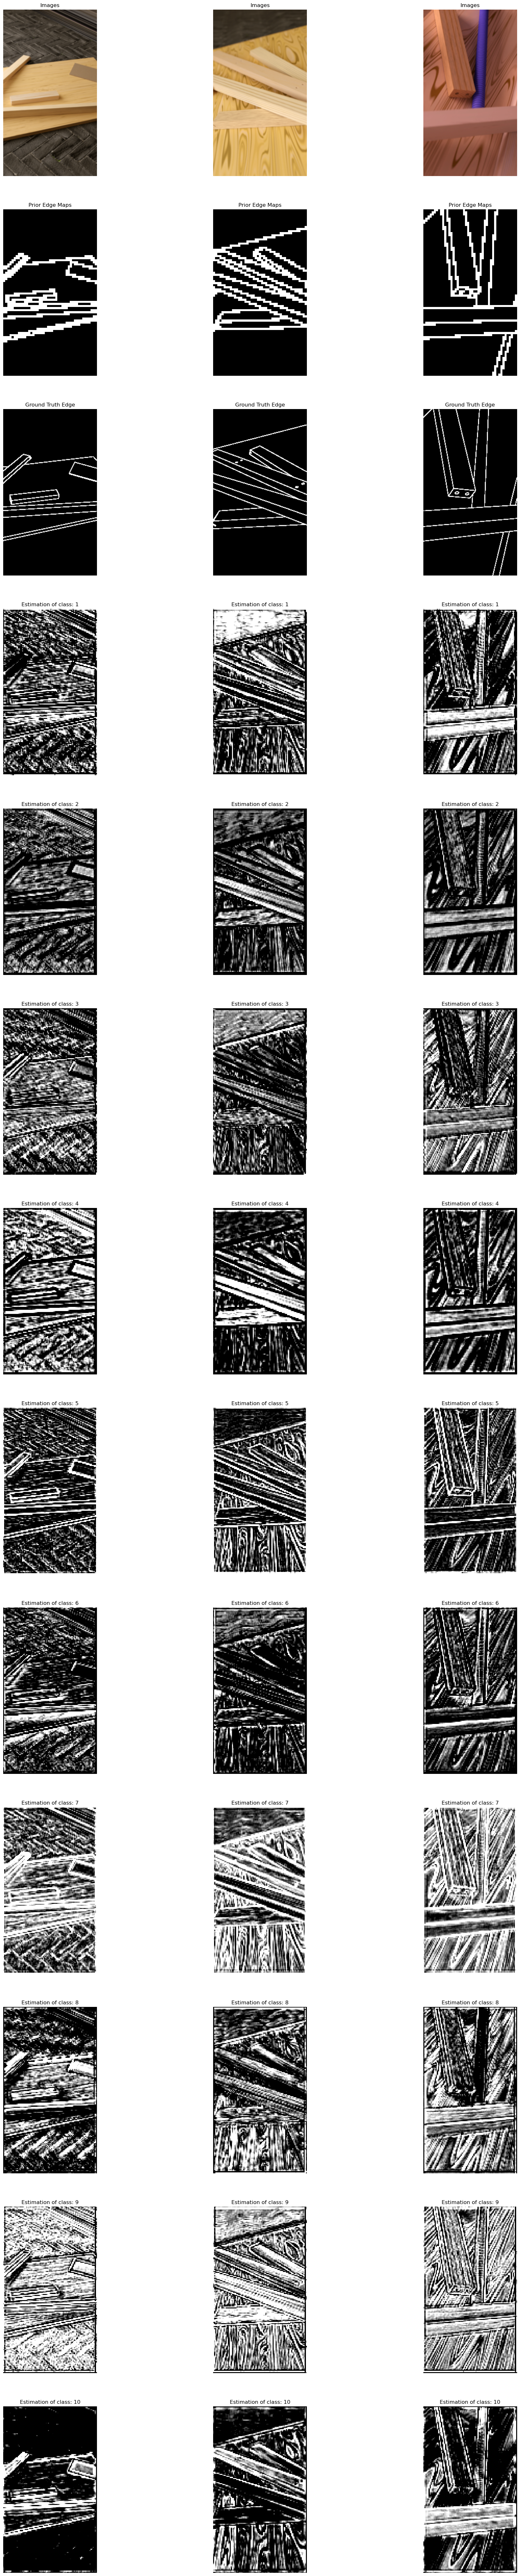

1/1 [==============================] - 0s 20ms/step


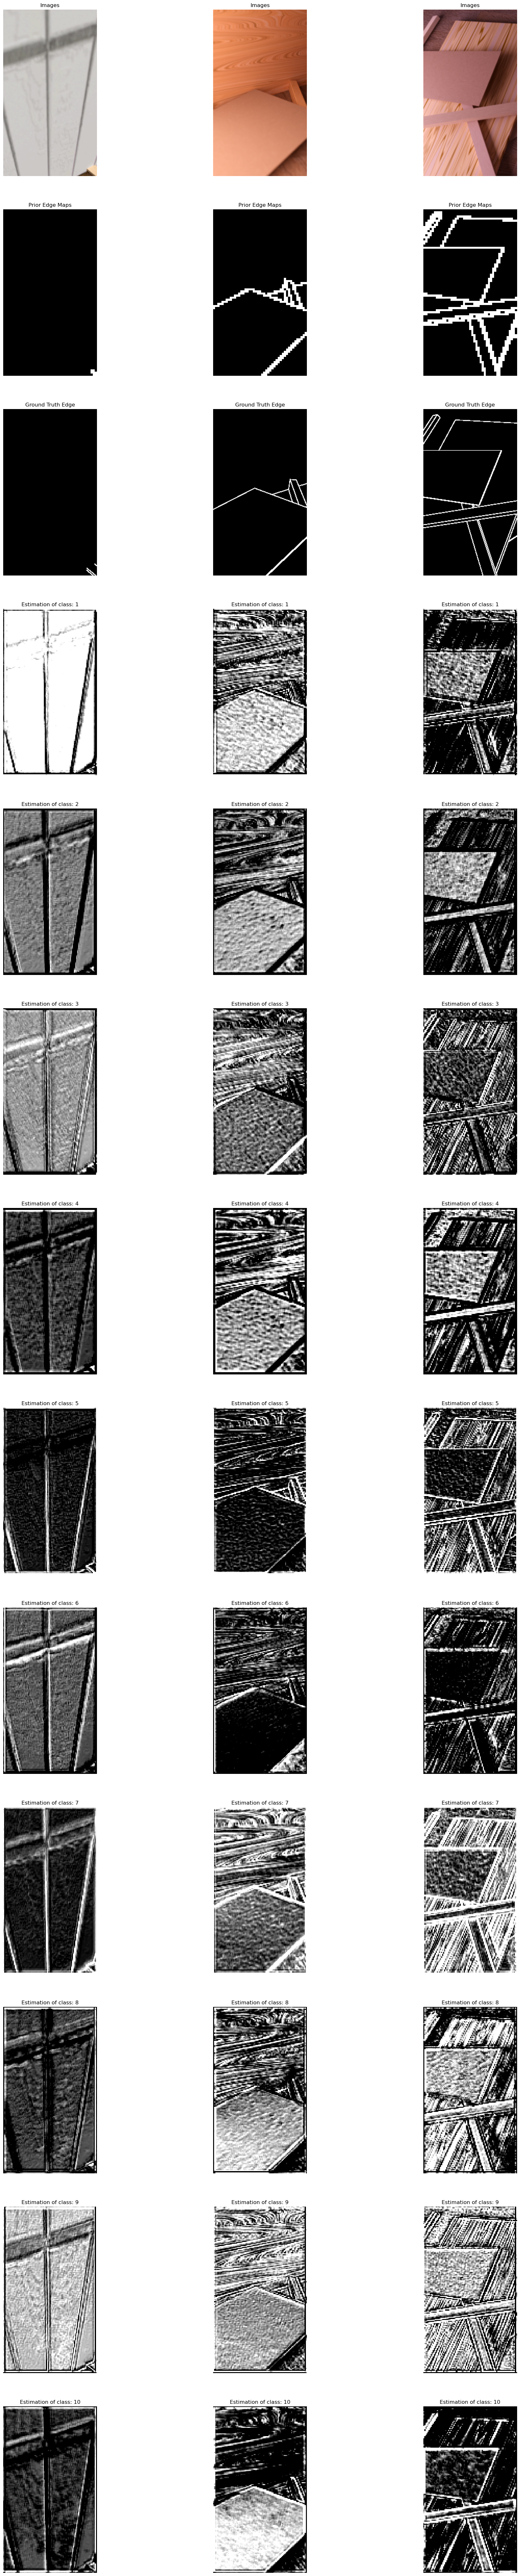

1/1 [==============================] - 0s 19ms/step


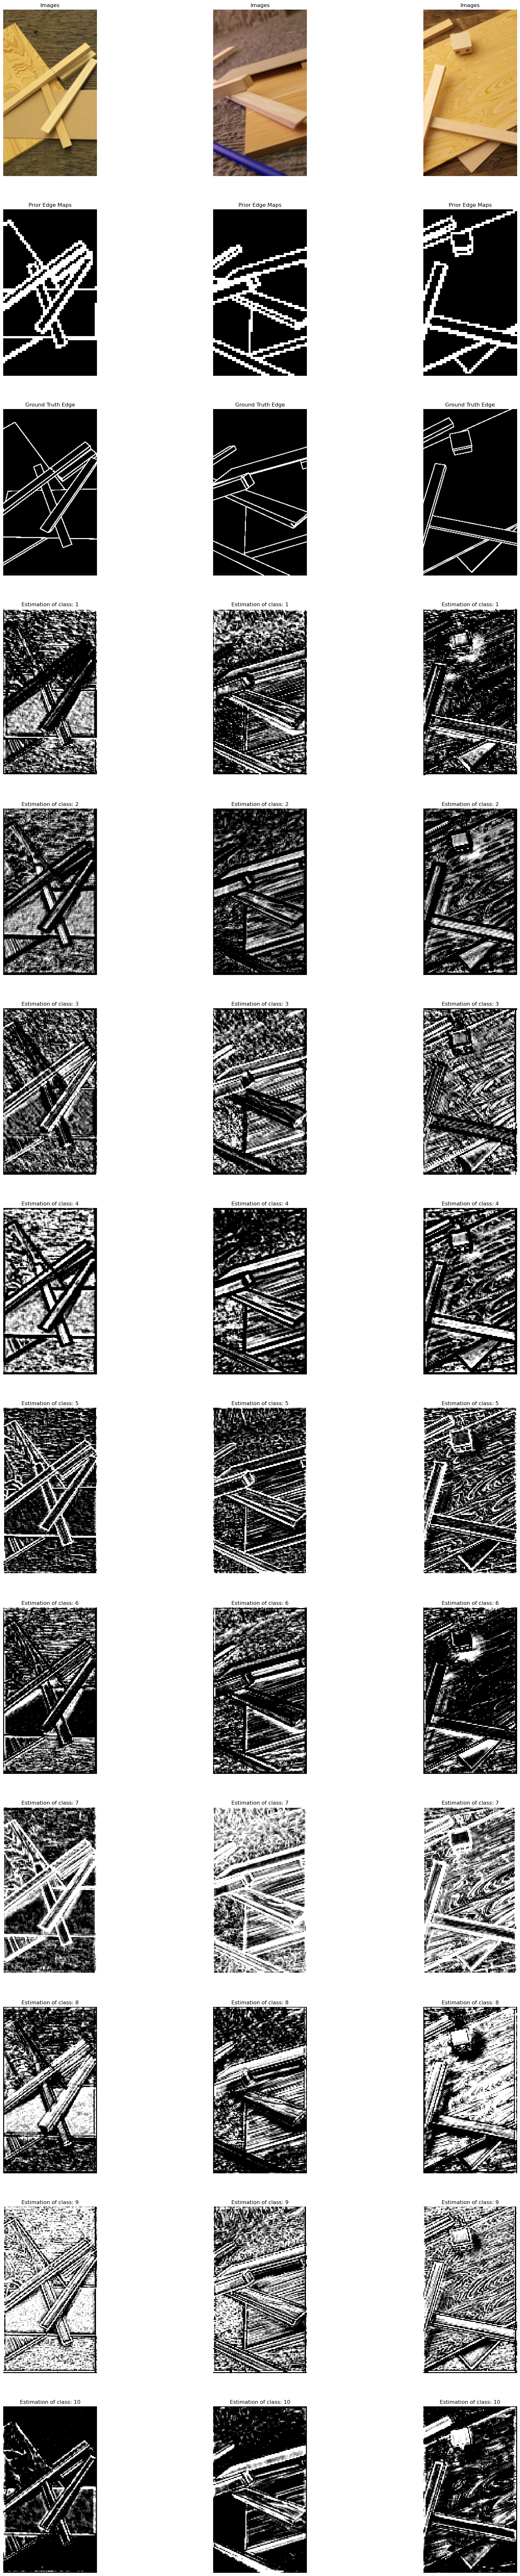

2023-01-25 21:23:42.068123: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [11]:
i = 0
for inp, out in test_ds.take(3):
    pred = model.predict(inp)
    path = os.path.join(Model.Data.paths["FIGURES"], "side_out_{}".format(i))
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    prior = inp['in_edge'],
                                    labels_edge=out['out_edge'],
                                    predictions_edge=pred[4],
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                   save=Model.cfg["SAVE"], path=path)
    i += 1

13/13 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.9927 - accuracy_edges_1: 0.9927 - f1_edges: 0.9351 - precision_edges: 0.9768 - recall_edges: 0.8969 - f1_edges_1: 0.9351 - precision_edges_1: 0.9768 - recall_edges_1: 0.8969
Max Accuracy Score = 0.994 at 0.500
MF1 = 0.943
MF1_1 = 0.943, ODS_1 = 0.500


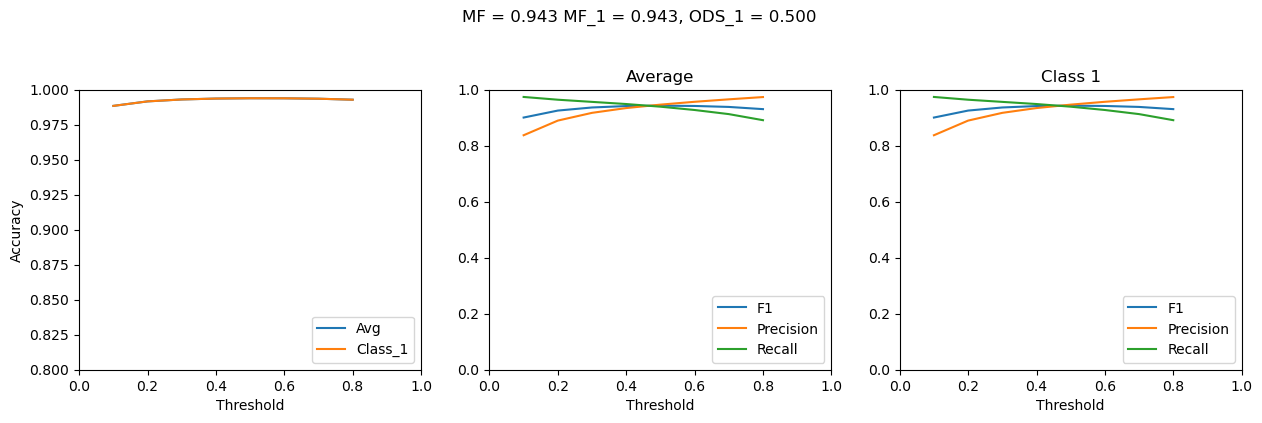

In [12]:
### Maximum F1 Score:
path = os.path.join(Model.Data.paths["FIGURES"], "threshold_metrics_evaluation_test_ds.svg")

Model.evaluate_and_plot_MF_score(model=model, dataset=test_ds, 
                                num_classes=DataProcessing.output_data_cfg["edge"]["num_classes"], path=path)

8/8 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9838 - accuracy_edges_1: 0.9838 - f1_edges: 0.8717 - precision_edges: 0.9419 - recall_edges: 0.8116 - f1_edges_1: 0.8717 - precision_edges_1: 0.9419 - recall_edges_1: 0.8116
Max Accuracy Score = 0.985 at 0.800
MF1 = 0.859
MF1_1 = 0.859, ODS_1 = 0.800


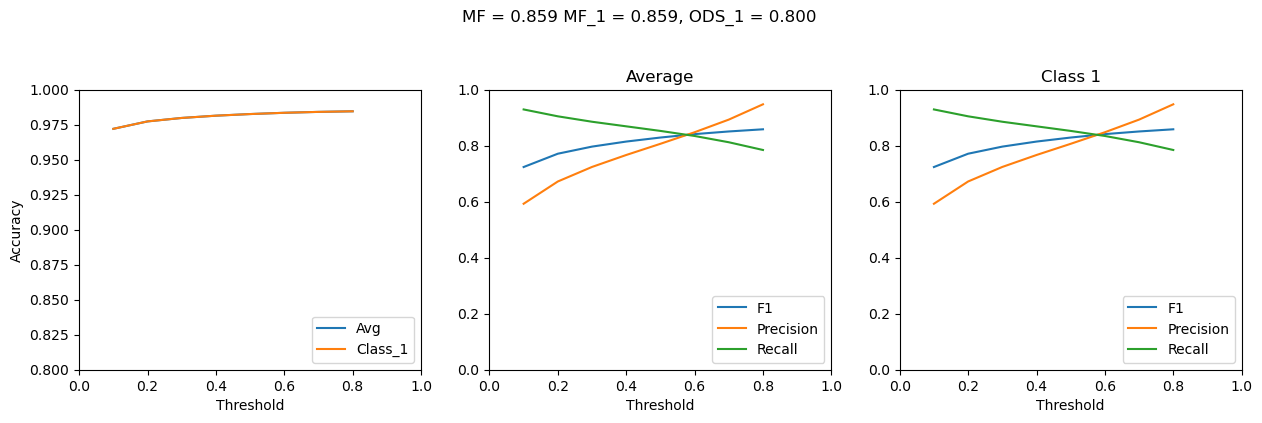

In [13]:
### Maximum F1 Score:
path = os.path.join(Model.Data.paths["FIGURES"],"threshold_metrics_evaluation_image_ds.svg")

Model.evaluate_and_plot_MF_score(model=model, dataset=img_only_ds, 
                                num_classes=DataProcessing.output_data_cfg["edge"]["num_classes"], 
                                path=path, threshold_edge_width=1.0)

In [14]:
if Model.cfg["CONVERT_TO_TFLITE"]:
    Model.convert_model_to_tflite(model)

=== TFLite ModelAnalyzer ===

Your TFLite model has '1' subgraph(s). In the subgraph description below,
T# represents the Tensor numbers. For example, in Subgraph#0, the DEQUANTIZE op takes
tensor #4 as input and produces tensor #80 as output.

Subgraph#0 main(T#0, T#1) -> [T#165, T#203, T#193, T#165, T#191]
  Op#0 DEQUANTIZE(T#4[]) -> [T#80]
  Op#1 DEQUANTIZE(T#5[]) -> [T#81]
  Op#2 DEQUANTIZE(T#6[]) -> [T#82]
  Op#3 DEQUANTIZE(T#7[]) -> [T#83]
  Op#4 DEQUANTIZE(T#8[]) -> [T#84]
  Op#5 DEQUANTIZE(T#9[]) -> [T#85]
  Op#6 DEQUANTIZE(T#10[]) -> [T#86]
  Op#7 DEQUANTIZE(T#11[]) -> [T#87]
  Op#8 DEQUANTIZE(T#12[]) -> [T#88]
  Op#9 DEQUANTIZE(T#13[]) -> [T#89]
  Op#10 DEQUANTIZE(T#14[]) -> [T#90]
  Op#11 DEQUANTIZE(T#15[]) -> [T#91]
  Op#12 DEQUANTIZE(T#16[]) -> [T#92]
  Op#13 DEQUANTIZE(T#17[]) -> [T#93]
  Op#14 DEQUANTIZE(T#18[]) -> [T#94]
  Op#15 DEQUANTIZE(T#19[]) -> [T#95]
  Op#16 DEQUANTIZE(T#20[]) -> [T#96]
  Op#17 DEQUANTIZE(T#21[]) -> [T#97]
  Op#18 DEQUANTIZE(T#22[]) -> [T#98]
  O

2023-01-25 21:23:55.052618: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-01-25 21:23:55.052654: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-01-25 21:23:55.053156: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior_p/TFLITE
2023-01-25 21:23:55.066889: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-01-25 21:23:55.066919: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior_p/TFLITE
2023-01-25 21:23:55.100409: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-01-25 21:23:55.113548: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-01-25 21:2